В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from difflib import get_close_matches

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
data = pd.read_csv('/content/monster_com-job_sample.csv')

data.sample(5)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
5828,United States of America,US,NaN,No,jobs.monster.com,A busy immigration firm is looking to hire an ...,Bilingual Immigration Attorney (Spanish/Englis...,Full Time,"Falls Church, VA 22042",Legal Services,http://jobview.monster.com/Bilingual-Immigrati...,NaN,Entry Level,2e3f4a62c56d406b45e070bb4805f3ce
1465,United States of America,US,NaN,No,jobs.monster.com,Job Details: Project Architect – will my clien...,Project Architect Job in Philadelphia Area,"Full Time, Employee","Philadelphia Area , PA",NaN,http://jobview.monster.com/project-architect-j...,NaN,Experienced (Non-Manager),9afc233e9ea667882c7ee81511774068
4065,United States of America,US,NaN,No,jobs.monster.com,Senior corporate recruiter neededClient Detail...,Human Resources: corporate recruiter Job in Br...,"Full Time , Temporary/Contract/Project","Bristol, PA",NaN,http://jobview.monster.com/human-resources-cor...,NaN,NaN,48426c97798f5be27fb9bbbcba218988
5488,United States of America,US,NaN,No,jobs.monster.com,The NY Midtown office of Cozen O’Connor is see...,Billing Assistant Job in New York City,Full Time,"New York City, NY 10172",Legal Services,http://jobview.monster.com/Billing-Assistant-J...,NaN,Entry Level,942fe72d04b749901e18727235728a08
11161,United States of America,US,NaN,No,jobs.monster.com,"Position Summary:Under supervision, the incumb...",LVN - Clinic Job in San Antonio,"Full Time, Employee","San Antonio, TX 78209",Healthcare Services,http://jobview.monster.com/lvn-clinic-job-san-...,NaN,Medical/Health,12c0614205282f21ef8d77adeb5cd394


In [ ]:
data_copy = data.copy()

In [ ]:
data.dtypes

country            object
country_code       object
date_added         object
has_expired        object
job_board          object
job_description    object
job_title          object
job_type           object
location           object
organization       object
page_url           object
salary             object
sector             object
uniq_id            object
dtype: object

In [ ]:
data.nunique()

country                1
country_code           1
date_added            78
has_expired            1
job_board              1
job_description    18744
job_title          18759
job_type              39
location            8423
organization         738
page_url           22000
salary              1737
sector               163
uniq_id            22000
dtype: int64

In [ ]:
not_nulls = data.shape[0] - data.isnull().sum()

In [ ]:
not_nulls

country            22000
country_code       22000
date_added           122
has_expired        22000
job_board          22000
job_description    22000
job_title          22000
job_type           20372
location           22000
organization       15133
page_url           22000
salary              3446
sector             16806
uniq_id            22000
dtype: int64

**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

In [ ]:
info = pd.DataFrame(columns=['column', 'dtype', 'expected_dtype', 'problems'])

info['column'] = pd.Series(data.columns)
info['dtype'] = info['column'].dtype
info['expected_dtype'] = 'str'
info.loc[2, 'expected_dtype'] = 'datetime'
info.loc[3, 'expected_dtype'] = 'bool'

info['problems'] = ''
info.loc[[0, 1, 3, 4], 'problems'] = 'only one value'
info.loc[[2], 'problems'] = 'significant number of values is null'
info.loc[[7, 8, 11], 'problems'] = 'different formats'

In [ ]:
info

,column,dtype,expected_dtype,problems
0,country,object,str,only one value
1,country_code,object,str,only one value
2,date_added,object,datetime,significant number of values is null
3,has_expired,object,bool,only one value
4,job_board,object,str,only one value
5,job_description,object,str,
6,job_title,object,str,
7,job_type,object,str,different formats
8,location,object,str,different formats
9,organization,object,str,


In [ ]:
for i in data.columns:
  data[i] = data[i].str.replace('\xa0', ' ')

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

<Axes: >

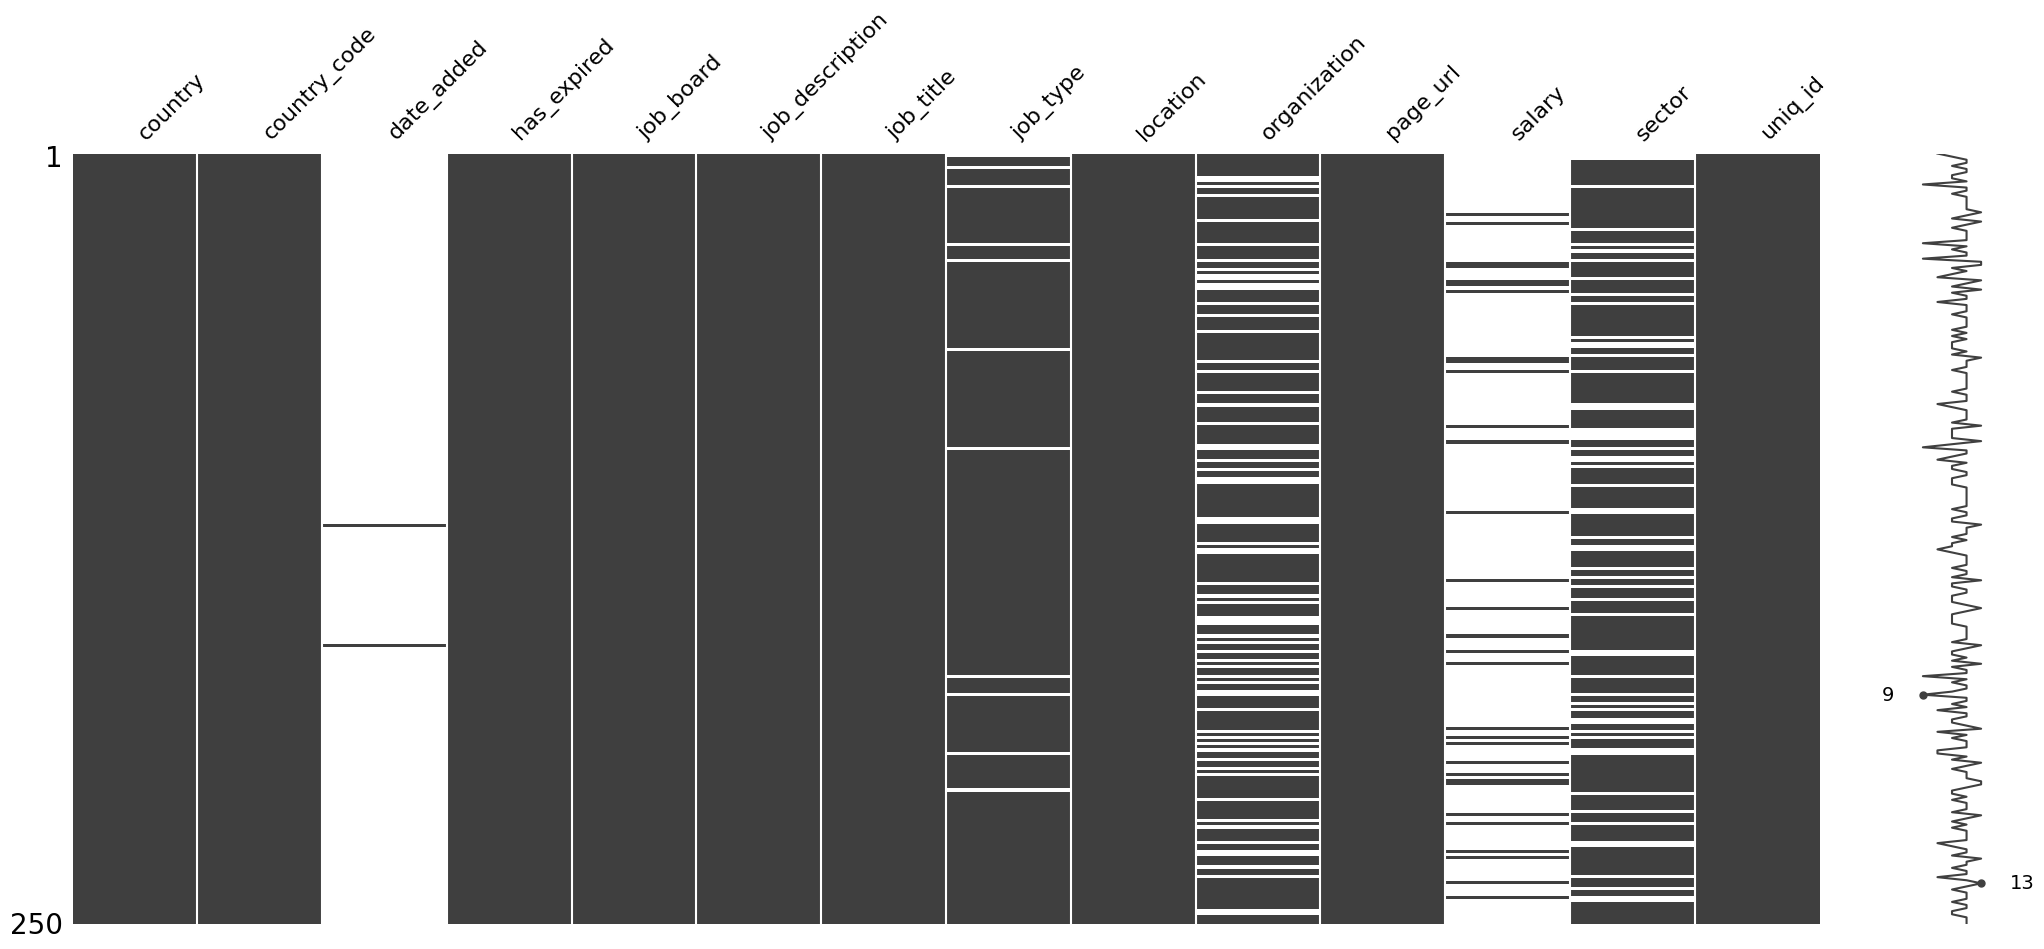

In [ ]:
msno.matrix(data.sample(250))

Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
print(f'Initial dataset size: {data.shape[0]}')
data_new = data.dropna()
print(f'Dataset size after dropping empty values: {data_new.shape[0]}')

Initial dataset size: 22000
Dataset size after dropping empty values: 5


Мы не можем удалить все строки с пустыми значениями, иначе будет невозможно извлечь никакую информацию (останется всего 5 строк).

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:



---


**1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?**


Встречаются столбцы с названием страны, в которой находится вакансия, но данный сайт только для США, поэтому колонки не пригодятся.

Есть столбец с указанием, просрочено ли объявление, все значения в датасете одинаковы и равны No. Возможно, эта колонка может быть полезна, если на сайте есть просроченные объявления. Тем не менее, в текущем состоянии мы не можем её использовать, поэтому удалим.

Также есть колонка `job_board`, в которой только одно значение, и других вариантов быть на этом сайте не может. Она не пригодится.


---



**2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?**

Есть колонки `country` и `country_code`, в которых нет разницы (к тому же, обе содержат только по одному уникальному значению, и обе не нужны).


---



**3. Какие столбцы содержательно нерелевантны? Обоснуйте.**

Мне кажется нерелевантной колонка `date_added`, так как в ней очень мало непустых значений, и по ней просто не может быть никакой аналитики.

Вероятно, также стоит удалить колонку `salary`, потому что пропущенных значений тоже очень много, но это будет не совсем верно, так как некоторые компании не указывают зарплату намеренно, и это может быть использовано в анализе.

In [ ]:
data = data.drop(columns=['country', 'country_code', 'job_board', 'date_added', 'has_expired'])

In [ ]:
data.head()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Будем удалять вакансии с повторяющимися названием и описанием.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

In [ ]:
print(f'Initial dataset size: {data.shape[0]}')
data = data.drop_duplicates(subset=['job_title', 'job_description'])
print(f'Dataset size after dropping empty values: {data.shape[0]}')

Initial dataset size: 22000
Dataset size after dropping empty values: 20616


Количество вакансий немного уменьшилось.

### Обработка датасета

#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
data['location'].sample(10)

17872                                    Garland, TX 75041
1042                                            Aurora, CO
13942                                       Swiftwater, PA
14437                                Des Plaines, IL 60018
3661     Location:   Monterey, CAOverview: This positio...
2072                                   Yorkville, IL 60560
362                                    Las Vegas, NV 89130
15778    Customer Service / Office Services Associate J...
17255                                     Dallas, TX 75201
825                                                     MO
Name: location, dtype: object

При визуальном изучении данных удалось найти следующие форматы:


*  Город + код штата (иногда через запятую, иногда с пробелом, иногда без всего)
*  Город + код штата + индекс
*  Код штата
*  Индекс

А также невалидные форматы:

* Контактное лицо, факс, номер телефона
* Название, описание вакансии (возможно, внутри есть местоположение)
* Запись "Location:"


Код штата представляет собой две заглавные буквы, индекс - пять цифр. Название города от кода штата чаще всего отделяется запятой, индекс от всего остального -- пробелом.

Попробуем найти и посчитать форматы регулярными выражениями.


In [ ]:
data['location']

0                                        Madison, WI 53702
1                                        Madison, WI 53708
2        DePuy Synthes Companies is a member of Johnson...
3                                                Dixon, CA
4                                             Camphill, PA
                               ...                        
21995                                       Cincinnati, OH
21996                                 Cincinnati, OH 45236
21997                                    Chicago, IL 60602
21998                                    Chicago, IL 60609
21999                                       Cincinnati, OH
Name: location, Length: 20616, dtype: object

In [ ]:
# Город + код штата + индекс
city_state_index = data[data['location'].str.fullmatch('\s*\w+\s*,\s*[A-Z]{2}\s*\d{5}\s*')]

# Код штата + индекс
state_index = data[data['location'].str.fullmatch('\s*[A-Z]{2}\s*\d{5}\s*')]

# Город + код штата
city_state = data[data['location'].str.fullmatch('\s*\w+\s*,\s*[A-Z]{2}\s*')]

# Город + индекс
city_index = data[data['location'].str.fullmatch('\s*\w+\s*,\s*\d{5}\s*')]

# Город
city = data[data['location'].str.fullmatch('\s*\w{2+}\s*')]

# Код штата
statee = data[data['location'].str.fullmatch('\s*[A-Z]{2}\s*')]

# Индекс
indeex = data[data['location'].str.fullmatch('\s*\d{5}\s*')]

city_state_index_count = city_state_index.location.count()
state_index_count = state_index.location.count()
city_state_count = city_state.location.count()
city_index_count = city_index.location.count()
city_count = city.location.count()
state_count = statee.location.count()
index_count = indeex.location.count()


print(f'Город + код штата + индекс: {city_state_index_count}')
print(f'Код штата + индекс: {state_index_count}')
print(f'Город + код штата: {city_state_count}')
print(f'Город + индекс: {city_index_count}')
print(f'Город: {city_count}')
print(f'Код штата: {state_count}')
print(f'Индекс: {index_count}')

Город + код штата + индекс: 7968
Код штата + индекс: 20
Город + код штата: 5123
Город + индекс: 0
Город: 0
Код штата: 230
Индекс: 239


In [ ]:
city_state_index.sample()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
9133,This individual will be responsible for the ef...,Equipment Detailer Job in Lakeside,Full Time,"Lakeside, CA 92040",Agriculture/Forestry/Fishing,http://jobview.monster.com/Equipment-Detailer-...,NaN,NaN,de830ef138268abe636886308dfd6bef


In [ ]:
state_index.sample()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
12967,The Technical Account Manager – Muscogee (Cree...,Technical Account Manager Job in,Full Time,OK 74147,Computer Hardware,http://jobview.monster.com/Technical-Account-M...,NaN,Experienced (Non-Manager),4d3a814d9f258ee7fd59b51c9c242d2c


In [ ]:
statee.sample()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
802,Concierge Security Officer in Chanhassen-1st S...,Concierge Security Officer in Chanhassen-st Sh...,Full Time Employee,MN,NaN,http://jobview.monster.com/concierge-security-...,NaN,Security/Protective Services,a263b1d23984c6e486a8c7b311b8c083


In [ ]:
indeex.sample()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
19503,"Nurse Aide/PC AidePart Time - Johnstown, PaAmb...",NURSE AIDE/PC AIDE Job in | Monster.com funct...,Part Time,15905,Healthcare Services,http://jobview.local-jobs.monster.com/NURSE-AI...,NaN,Entry Level,74adbf534b3e06df1ea940adcbc64a2c


In [ ]:
city_state.sample()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
4801,« back Learn More Help Desk Supervisor Job #: ...,Help Desk Supervisor Job in Columbus,Full Time Employee,"Columbus, OH",Computer/IT Services,http://jobview.monster.com/Help-Desk-Superviso...,NaN,Experienced (Non-Manager),5f89e3760a738090c5c0005dba48e2e7


На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

<ipython-input-120-74bad71e3574>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='format', y='number', data=to_plot, palette='viridis')


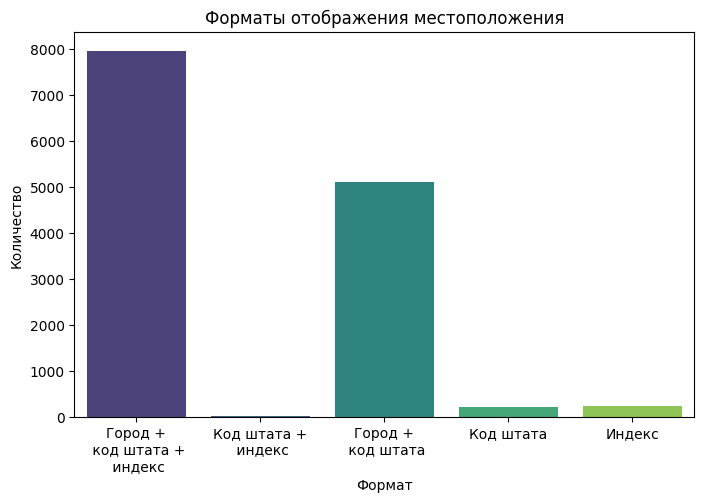

In [ ]:
data_dict = {
    'format': ['Город +\n код штата +\n индекс', 'Код штата +\n индекс',
               'Город +\n код штата', 'Код штата', 'Индекс'],
    'number': [city_state_index.location.count(),
               state_index.location.count(),
               city_state.location.count(),
               statee.location.count(),
               indeex.location.count()]
}

to_plot = pd.DataFrame(data_dict)

plt.figure(figsize=(8, 5))
sns.barplot(x='format', y='number', data=to_plot, palette='viridis')
plt.ylabel('Количество')
plt.xlabel('Формат')

plt.title('Форматы отображения местоположения')
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
data_valid_loc = pd.concat([city_state_index, city_state, state_index, statee, indeex], ignore_index=True)

data_valid_loc.sample(5)

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
3178,Lifestyle Communities seek to hire a full time...,Maintenance Technician Job in Columbus,Full Time,"Columbus, OH 43215",Real Estate/Property Management,http://jobview.monster.com/Maintenance-Technic...,NaN,Experienced (Non-Manager),0bcc8c709106f114678e11ec812ef136
12872,Job Responsibilities 1) Responds to all open s...,Customer Follow-up Request Specialist Job in N...,"Full Time, Employee","Nicholasville, KY",Accounting and Auditing Services,http://jobview.monster.com/customer-follow-up-...,NaN,Administrative/Clerical,58f901c5098095f5f7a542b9710418df
2030,About Aramark Aramark (NYSE: ARMK) is in the c...,Student Worker/Barista/Cashier- Georgia Pacifi...,"Full Time, Employee","Atlanta, GA 30303",NaN,http://jobview.monster.com/student-worker-bari...,NaN,Food Services/Hospitality,498ffdc5e04d12d07dc642d5226abcdb
12173,DTI is actively recruiting a Real Estate Legal...,Real Estate Legal Secretary Job in Dallas,Full Time,"Dallas, TX",NaN,http://jobview.monster.com/Real-Estate-Legal-S...,BOE,Experienced (Non-Manager),34c51e10e9d28da64d90a55b286ebe40
7202,Full-TimeBrookdale Galleria 2929 Post Oak Blvd...,Registered Nurse RN Job in Houston,Full Time Employee,"Houston, TX 77056",Healthcare Services Other/Not Classified,http://jobview.monster.com/registered-nurse-rn...,NaN,Medical/Health,4a4cde58ee48d3e6885773fee699a856


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
data_invalid_loc = pd.concat([data, data_valid_loc]).drop_duplicates(keep=False)

In [ ]:
data_invalid_loc.shape[0]

7036

In [ ]:
data.shape[0]

20616

In [ ]:
data_valid_loc.shape[0]

13580

In [ ]:
data_invalid_loc.sample(5)

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
7035,REQUEST FOR INTEREST (RFI) #605 Contra Costa C...,GOVERNMENT Job in Walnut Creek,Full Time,"Walnut Creek, CA 94598",Other/Not Classified,http://jobview.monster.com/government-job-waln...,NaN,NaN,ed2953e37d9d191b457b69e85f3650b7
13316,Overview The QA Technician develops and implem...,Apparel Quality Assurance Job in Eden Prairie,Full Time Employee,"Eden Prairie, MN 55344",Clothing and Textile ManufacturingRetailBroadc...,http://jobview.monster.com/Apparel-Quality-Ass...,NaN,Food Safety and InspectionGeneral/Other: Quali...,8fc9c5400a6e94ccaca5c654f673f8bb
20164,Insight Global is looking for a Java Developer...,Java Developer Job in Columbus,Full Time,Location:,Banking,http://jobview.monster.com/java-developer-job-...,NaN,IT/Software Development,afde93207e459f1cd56d1c1bd05e3f0d
3295,Job Description Registered professional nurse ...,RN,"Full Time, Employee","San Antonio, TX",Healthcare Services,http://jobview.monster.com/RN-Intermediate-Car...,NaN,Medical/Health,ee6dd6a22642296cdc7b343e4d817e13
10298,Pentair Overview Pentair is an S&P 500 diversi...,Production Supervisor Job in White Bear Township,Full Time Employee,"White Bear Township, MN 55110",Manufacturing - Other,http://jobview.monster.com/Production-Supervis...,"60,000.00 - 70,000.00 $ /hour",Manufacturing/Production/Operations,895cbcbd6dc0491a42b862bca5ed46fc


В невалидные форматы, кроме действительно невалидных, попали такие как:

* Город + код штата без запятой (возможно, остальные виды валидных форматов без запятой тоже есть)
* Город + код штата + индекс или город + код штата, где город состоит из нескольких слов

Поищем и удалим слова "address" в местоположениях, а также приведём пробелы в приличный вид, также удалим "Multiple locations", контактную информацию, телефоны и факсы.

In [ ]:
data_invalid_loc['location'] = data_invalid_loc['location'].str.replace('address', '', case=False)
data_invalid_loc['location'] = data_invalid_loc['location'].str.replace('home based', '', case=False)

In [ ]:
keywords_to_clear = ['contact', 'phone', 'fax', 'email', 'description', 'position',
                     'title', 'recruiter', 'clinical', 'location', 'director']

for keyword in keywords_to_clear:
    data_invalid_loc.loc[data_invalid_loc['location'].str.lower().str.contains(keyword), 'location'] = ''


In [ ]:
pattern = r'\s*(?P<city>\w[\w\s]+\w)?,?\s*(?P<state>[A-Z]{2})?\s*(?P<index>d{5})?\s*'

data_invalid_loc[['city', 'state', 'index']] = data_invalid_loc['location'].str.extract(pattern)

data_invalid_loc.dropna(subset=['city', 'state', 'index'], how='all', inplace=True)

data_invalid_loc.sample(5)

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,city,state,index
21257,DevOps Engineer A leading provider of IT ...,DevOps Engineer Job in Rochelle Park,Full Time,"Rochelle Park, NJ 07662",NaN,http://jobview.monster.com/DevOps-Engineer-Job...,NaN,Experienced (Non-Manager),a267e150436de5a77c99f191b63c88d9,Rochelle Park,NJ,NaN
9632,Streamline Circuits is a leader in manufacturi...,VP of Operations Manager Job in Santa Clara,Full Time,"Santa Clara, CA 95050",Manufacturing - Other,http://jobview.monster.com/VP-of-Operations-Ma...,NaN,Experienced (Non-Manager),b62570be75b1b1a514d6262e6678d928,Santa Clara,CA,NaN
14029,RESPONSIBILITIES:Kforce has a client that is s...,Systems Quality Assurance Analyst Job in West ...,"Full Time, Temporary/Contract/Project","West Des Moines, IA 50266",NaN,http://jobview.monster.com/Systems-Quality-Ass...,NaN,Experienced (Non-Manager),d4a726124c53e46eabe7528b5ce5aa6c,West Des Moines,IA,NaN
7942,Sales Management TraineeLooking to use your sk...,Sales Management Trainee Job in Las Vegas,Full Time Employee,"Las Vegas, NV 89119",NaN,http://jobview.monster.com/Sales-Management-Tr...,NaN,Account Management (Non-Commissioned)General/O...,38cabf641877d10b50e22b9aa547b28f,Las Vegas,NV,NaN
5776,CALL WES OR STEPHANIE TODAY1-866-333-5333We wa...,Truck Driver – Benefits Included – --- Job in ...,Full Time Employee,"State College, PA",NaN,http://jobview.monster.com/Truck-Driver-%E2%80...,NaN,Logistics/Transportation,6d0142be1aba4ed10ebb186afeccecdb,State College,PA,NaN


У нас всё ещё остались ячейки, в которых город и код штата слиты вместе и лежат в столбце "Город". Исправим это.
WashingtonDC трогать не будем.

In [ ]:
pattern = re.compile(r'([A-Za-zs]+)([A-Z]{2})$')

def split_city_state(city):
    if pd.isnull(city) or city == 'WashingtonDC':
        return city, np.nan
    if isinstance(city, str):
        match = pattern.match(city)
        if match:
            return match.groups()
    return city, np.nan

data_invalid_loc[['city', 'state']] = data_invalid_loc.apply(lambda row: split_city_state(row['city']), axis=1, result_type='expand')


In [ ]:
data_invalid_loc.sample(5)

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,city,state,index
3459,Dreaming of a health care career? As a Nationa...,Health Care Specialist Job in Eastover body {...,NaN,Eastover 29044,NaN,http://jobview.monster.com/Health-Care-Special...,NaN,General/Other: Medical/Health,514463ae66d0b6d58b02f05f05f2e980,Eastover 29044,NaN,NaN
19697,The Birchwood - Nestled along bustling Beach D...,Hostess Job in Saint Petersburg,Full Time,"Saint Petersburg, FL 33701",Restaurant/Food Services,http://jobview.monster.com/Hostess-Job-Saint-P...,$8.05+ /hour,Entry Level,cb998901b1622ada3269a35c04d62f0f,Saint Petersburg,NaN,NaN
18912,Description/Job SummaryReceive and inspect del...,Food Service Worker I Job in Phoenix Sky Harbo...,Full Time,"Phoenix Sky Harbor Airport, AZ 85034",Food and Beverage Production,http://jobview.monster.com/Food-Service-Worker...,NaN,Entry Level,1ceb52b53f76aeae3914a589c90f77ff,Phoenix Sky Harbor Airport,NaN,NaN
21070,About UsStar Management is an established lead...,Regional Property Manager Job in Santa Ana,Full Time,"Santa Ana, CA 92701",All,http://jobview.monster.com/regional-property-m...,NaN,Experienced (Non-Manager),8bf5f983f1f3a22affbd57b8f7acf5c7,Santa Ana,NaN,NaN
7923,Brightwood College fka Kaplan College is part ...,Instructor - Adjunct - Medical Billing and Cod...,"Full Time, Employee","Las Vegas, NV",Education,http://jobview.monster.com/Instructor-Adjunct-...,NaN,Education/Training,91f3bfde0ffa6afe8b88706f50dc08d9,Las Vegas,NaN,NaN


In [ ]:
data_invalid_loc.state.unique()

array([nan, 'TX', 'IN', 'RS', 'GA', 'CE', 'MA', 'ON', 'FL', 'IL', 'OH',
       'MI', 'VA', 'WI', 'CO', 'ER', 'TS', 'NJ', 'IT', 'TN', 'RE', 'NN',
       'US', 'RT', 'LE', 'CA'], dtype=object)

Всё, что смогли, мы вытащили. Теперь применим преобразование колонки `location` на датасет с валидными местоположениями.

In [ ]:
pattern = r'\s*(?P<city>\w[\w\s]+\w)?,?\s*(?P<state>[A-Z]{2})?\s*(?P<index>d{5})?\s*'

data_valid_loc[['city', 'state', 'index']] = data_valid_loc['location'].str.extract(pattern)

data_valid_loc.dropna(subset=['city', 'state', 'index'], how='all', inplace=True)

In [ ]:
data_valid_loc.sample(5)

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,city,state,index
1081,Seeking Physicians with the following speciali...,Physician Multiple Specialities Great Perks Jo...,Full Time,"Davenport, IA 52804",Healthcare Services,http://jobview.monster.com/Physician-Multiple-...,NaN,Experienced (Non-Manager),9196aae7de5687fe9eb064f0d3f916f0,Davenport,IA,NaN
9833,"There are retail jobs, and there are retail ca...",Retail Sales Consultant Shawnee OK Job in Shawnee,NaN,"Shawnee, OK",NaN,http://jobview.monster.com/retail-sales-consul...,NaN,NaN,6fab617644cc8175ebdf5236f9e0c04c,Shawnee,OK,NaN
8556,The Judge Group is currently in search of a UI...,UI Engineer,"Full Time, Employee","Austin, TX",Computer/IT Services,http://jobview.monster.com/ui-engineer-creativ...,NaN,IT/Software Development,a1cf205dcd465ac0a1b8e865db554a22,Austin,TX,NaN
11549,"#TrackingJobBody table, #TrackingJobBody a {<b...",Senior Auditor Job in Norwell,Full Time Employee,"Norwell, MA",Other/Not Classified,http://jobview.monster.com/senior-auditor-job-...,NaN,Accounting/Finance/Insurance,51cdacad68aa02910c99fd07f8e000b1,Norwell,MA,NaN
6223,A large practice in Medical City is seeking an...,Medical Receptionist Job in Dallas,Full Time,"Dallas, TX 75201",All,http://jobview.monster.com/Medical-Receptionis...,NaN,Experienced (Non-Manager),9e962a353c972a2babb26dc793deb847,Dallas,TX,NaN


Соединим датасеты.

In [ ]:
data_city_state_index = pd.concat([data_valid_loc, data_invalid_loc], ignore_index=True)

In [ ]:
data_city_state_index.head()

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,city,state,index
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,Madison,WI,NaN
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,Madison,WI,NaN
2,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7,Austin,TX,NaN
3,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,a6a2b5e825b8ce1c3b517adb2497c5ed,Austin,TX,NaN
4,Aflac Insurance Sales Agent While a career in ...,Aflac Insurance Sales Agent Job in Berryville,Full Time,"Berryville, VA 22611",Insurance,http://jobview.monster.com/aflac-insurance-sal...,NaN,Customer Support/Client Care,2f8bdf60db4d85627ab8f040e67aa78d,Berryville,VA,NaN


In [ ]:
data = data_city_state_index

In [ ]:
data.head(3)

,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,city,state,index
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,Madison,WI,NaN
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,Madison,WI,NaN
2,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7,Austin,TX,NaN


In [ ]:
data.drop(columns=['location'])

,job_description,job_title,job_type,organization,page_url,salary,sector,uniq_id,city,state,index
0,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,Madison,WI,NaN
1,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,Madison,WI,NaN
2,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7,Austin,TX,NaN
3,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,a6a2b5e825b8ce1c3b517adb2497c5ed,Austin,TX,NaN
4,Aflac Insurance Sales Agent While a career in ...,Aflac Insurance Sales Agent Job in Berryville,Full Time,Insurance,http://jobview.monster.com/aflac-insurance-sal...,NaN,Customer Support/Client Care,2f8bdf60db4d85627ab8f040e67aa78d,Berryville,VA,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18612,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,NaN,NaN,1a07760e237ce5fbc4b8a4e3a4fa2dff,Cold Spring,NaN,NaN
18613,Security Officer Aegis Protective Services is ...,Security Officer Job in West Chester,Full Time,All,http://jobview.local-jobs.monster.com/Security...,NaN,Entry Level,6196e6ff7eb05afd467d478c5b1d6d6a,West Chester,NaN,NaN
18614,PRODUCTION SPECIALIST PRIMARY FUNCTIONS: The ...,Production Specialist – Mortgage Loan Processo...,Full Time,NaN,http://jobview.monster.com/Production-Speciali...,NaN,Entry Level,d1b466a37985e674dbd593444d9e8dcd,Day Heights,NaN,NaN
18615,CULINARY CAREER WEST CHESTER OHIO!EXECUTIVE CH...,EXECUTIVE CHEF WEST CHESTER OHIO $K-$K PLUS! B...,Full Time,All,http://jobview.monster.com/EXECUTIVE-CHEF-WEST...,"75,000.00 - 85,000.00 $ /yearHighly Competitiv...",Manager (Manager/Supervisor of Staff),8e9f8638556bc1fd671bb99f4f01ac4d,West Chester,NaN,NaN


Далее работать будем с обновлённым датафреймом.

#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
salary_draft = data.salary.dropna()

In [ ]:
salary_draft.sample(10)

16739                    30.00 - 36.00 $ /hour
10028                    10.00 - 12.50 $ /hour
86                       60.00 - 82.00 $ /hour
274                           $1,100.00+ /week
7611                     15.00 - 15.00 $ /hour
2441                     12.00 - 13.00 $ /hour
7554                     13.00 - 20.00 $ /hour
3138                       10.66 - 12.54 /hour
5123             60,000.00 - 75,000.00 $ /year
2645     Nurse Supervisor- $3000 Sign-On Bonus
Name: salary, dtype: object

Присутствуют форматы:

* NaN (очень много)

* 60,000.00 - 60,000.00 &dollar; &sol;year (+ опционально какой-то текст после этого)

* Up to &dollar;30000.00

* 45.00 - 60.00 &dollar; &sol;hour (+ может быть текст после этого)

* 70,000.00+ &sol;year

* 22.00+ &sol;hour

* Выбросы (Commission, Yearly Salary и прочие)

У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Для начала уберём все знаки доллара отовсюду. Мы в Америке, поэтому всё в долларах, даже если это не написано.

In [ ]:
data['salary'] = data['salary'].str.replace('$', '')
data['salary'] = data['salary'].str.replace('per', '', case=False)

In [ ]:
salary_draft = data.salary.dropna()

In [ ]:
salary_draft.sample(10)

2018                                  18.00 - 25.00  /hour
5751                                   0.00 - 45.00  /hour
11090                       115,000.00 - 120,000.00  /year
10283                        60,000.00 - 100,000.00  /year
18183                         38,000.00 - 47,000.00  /year
2950     Compensation is based on exience, and owner ma...
2319                                  22.00 - 22.00  /hour
8261                                  35.00 - 50.00  /hour
3975     35,000.00 - 45,000.00  /yearBase + Uncapped Bonus
10038                                       Excellent Base
Name: salary, dtype: object

Можно преобразовать данные следующим образом: вместо колонки `salary` введём четыре новых: `salary_from`, `salary_to`  `salary_period`, `bonus`.
* если у зарплаты формат `что-то` - `что-то`, то `salary_from` - первое значение, `salary_to` - второе.

* если одно значение, то `salary_from` и `salary_to` заполняются этим значением.

* если UP TO или +, то одно значение заполняем, второе оставляем пустым.

Колонку с периодом заполним 'hour', 'year', 'day' или 'week'.

Bonus - то, что идёт после зарплаты. Его может не быть (тогда значение будет пустым).

Ситуации, когда в зарплате нет никаких чисел, будем интерпретировать как отсутствие данных о зарплате и положим в ячейки пустые значения.

In [ ]:
range_pattern = r'(\d{1,3}(?:,\d{3})*.\d{2})\s*-\s*(\d{1,3}(?:,\d{3})*.\d{2})'
single_value_pattern = r'^(\d{1,3}(?:,\d{3})*.\d{2})$'
up_to_pattern = r'Up\s+to\s+(\d{1,3}(?:,\d{3})*.\d{2})'
plus_pattern = r'(\d{1,3}(?:,\d{3})*.\d{2})\s*\+'

In [ ]:
data['salary_from'] = np.nan
data['salary_to'] = np.nan
data['salary_period'] = ''
data['bonus'] = ''
data['salary_from'].fillna(data['salary'].str.extract(single_value_pattern)[0], inplace=True)
data['salary_to'].fillna(data['salary_from'], inplace=True)

data[['salary_from', 'salary_to']] = data['salary'].str.extract(range_pattern)
data['salary_from'].fillna(data['salary'].str.extract(up_to_pattern)[0], inplace=True)

data['salary_to'].fillna(data['salary'].str.extract(plus_pattern)[0], inplace=True)

data.loc[data['salary'].str.contains('hour', case=False, na=False), 'salary_period'] = 'hour'
data.loc[data['salary'].str.contains('year', case=False, na=False), 'salary_period'] = 'year'
data.loc[data['salary'].str.contains('day', case=False, na=False), 'salary_period'] = 'day'
data.loc[data['salary'].str.contains('week', case=False, na=False), 'salary_period'] = 'week'
data.loc[data['salary'].str.contains('month', case=False, na=False), 'salary_period'] = 'month'

bonus_pattern = r'(?:(?:/day|/year|/hour|/week)\s+|\+\s*)(.*)'

data['bonus'] = data['salary'].str.extract(bonus_pattern, expand=False)


data['salary_from'] = data['salary_from'].str.replace('[^\d.]', '', regex=True).astype(float)
data['salary_to'] = data['salary_to'].str.replace('[^\d.]', '', regex=True).astype(float)

data.drop('salary', axis=1, inplace=True)


In [ ]:
data['bonus'] = data.bonus.str.replace('/year|/week|/month|/day|/hour|\+', '')

In [ ]:
data['bonus'].unique()

array([nan, '/yearplus benefits', '/hour',
       'Uncapped Commissions + Benefits', 'Annual Bonus', '/week',
       'profit sharing', '/year', '/yearCompetitive Benefits Package',
       '/yearhigh bonus potential and full benefits package', 'bonus',
       '/yearB.O.E.', '/yearbonus', 'contract position', 'gas',
       'Commissions + Benefits', '/hourannual bonus available', '',
       'Bonus', 'OT with bonus potential', 'Uncapped Bonus',
       '/hourNegotiable', '/hourProduction Bonus', '/yearDOE', 'Benefits',
       '/yearCommission', 'Commission and Bonuses', '/hourbonuses',
       'Bonuses + Benefits', 'in commission', 'Commission Plan',
       'Bonus Structure', 'Commission', 'Uncapped Commission',
       'Uncapped Commission / Bonus Structure',
       'Commissions or Commissions + Bonus', '/yearbonus,nicentive',
       '25,000 bonus - formance based, 401K, Medical, Dental, Vision and More',
       '+', '/year20 Hours a week!', '/yearbonus,incentive based',
       '/hourDOE Gen

In [ ]:
data.salary_period.unique()

array(['', 'hour', 'year', 'week', 'day', 'month'], dtype=object)

Колонки выглядят вполне адекватно.

Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

In [ ]:
salaries_yearly = []
salaries_hourly = []

for i in data.index:
  if not np.isnan(data.iloc[i, :].salary_from) and not np.isnan(data.iloc[i, :].salary_to) and data.iloc[i, :].salary_from != data.iloc[i, :].salary_to:
    if data.iloc[i, :].salary_period == 'year':
      salaries_yearly.append(data.iloc[i, :].salary_from)
      salaries_yearly.append(data.iloc[i, :].salary_to)

    elif data.iloc[i, :].salary_period == 'hour':
      salaries_hourly.append(data.iloc[i, :].salary_from)
      salaries_hourly.append(data.iloc[i, :].salary_to)

  elif not np.isnan(data.iloc[i, :].salary_from) and not np.isnan(data.iloc[i, :].salary_to) and data.iloc[i, :].salary_from == data.iloc[i, :].salary_to:
    if data.iloc[i, :].salary_period == 'year':
      salaries_yearly.append(data.iloc[i, :].salary_from)

    elif data.iloc[i, :].salary_period == 'hour':
      salaries_hourly.append(data.iloc[i, :].salary_from)

  elif not np.isnan(data.iloc[i, :].salary_from) and np.isnan(data.iloc[i, :].salary_to):
    if data.iloc[i, :].salary_period == 'year':
      salaries_yearly.append(data.iloc[i, :].salary_from)

    elif data.iloc[i, :].salary_period == 'hour':
      salaries_hourly.append(data.iloc[i, :].salary_from)


  elif np.isnan(data.iloc[i, :].salary_from) and not np.isnan(data.iloc[i, :].salary_to):
    if data.iloc[i, :].salary_period == 'year':
      salaries_yearly.append(data.iloc[i, :].salary_to)

    elif data.iloc[i, :].salary_period == 'hour':
      salaries_hourly.append(data.iloc[i, :].salary_to)

In [ ]:
print(np.median(np.array(salaries_yearly)))
print(np.median(np.array(salaries_hourly)))

65000.0
18.0


<ipython-input-152-864218f9c36e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salaries_yearly, label='Yearly Salaries', color='blue', shade=True)
<ipython-input-152-864218f9c36e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(salaries_hourly, label='Hourly Salaries', color='orange', shade=True)


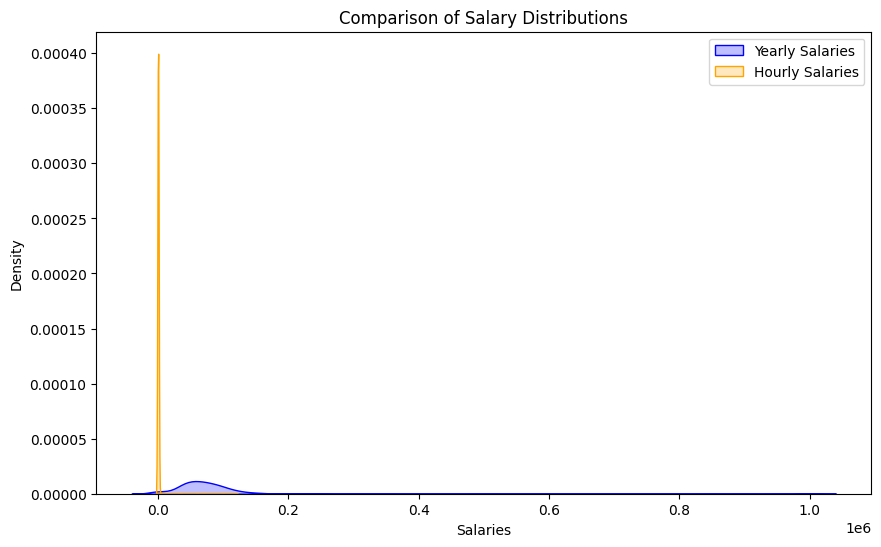

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(salaries_yearly, label='Yearly Salaries', color='blue', shade=True)
sns.kdeplot(salaries_hourly, label='Hourly Salaries', color='orange', shade=True)

plt.legend()

plt.xlabel('Salaries')
plt.ylabel('Density')
plt.title('Comparison of Salary Distributions')

plt.show()


Мы видим, что сколько-нибудь вероятные значения годовых зарплат начинаются от тысяч. Наиболее вероятные значения часовых зарплат около нуля (посчитав медиану, понимаем, что это примерно 18 долларов).

Давайте классифицировать зарплаты по часовым и годовым, разбивая их на меньше 1000 и больше 1000.

При этом не будем брать в расчёт зарплаты в день, неделю и месяц, потому что их мало, и данные в таких строчках очень странные.

In [ ]:
for _, row in data.iterrows():
    bonus = row['bonus']
    if pd.notna(row['salary_from']) and pd.notna(row['salary_to']):
        if row['salary_from'] > 1000 and row['salary_to'] > 1000:
            row['salary_period'] = 'year'
    elif pd.isna(row['salary_from']) and pd.notna(row['salary_to']) and row['salary_to'] > 1000:
        row['salary_period'] = 'year'
    elif pd.notna(row['salary_from']) and pd.isna(row['salary_to']) and row['salary_from'] > 1000:
        row['salary_period'] = 'year'
    elif pd.isna(row['salary_from']) and pd.isna(row['salary_to']):
        row['salary_period'] = ''
    else:
        row['salary_period'] = 'hour'
    row['bonus'] = bonus

In [ ]:
data.sample(5)

,job_description,job_title,job_type,location,organization,page_url,sector,uniq_id,city,state,index,salary_from,salary_to,salary_period,bonus
2595,Reliability Engineering SupervisorOur client i...,Reliability Engineering Supervisor - Manufactu...,Full Time,"Madison, WI 53701",Biotechnology/Pharmaceuticals,http://jobview.monster.com/Reliability-Enginee...,Manager (Manager/Supervisor of Staff),60491d9d07c1c9f28ae87449a80ab341,Madison,WI,NaN,70000.0,95000.0,year,NaN
16866,Regulatory Quality Assurance Specialist needed...,Regulatory Quality Assurance Specialist Job Jo...,Full Time Employee,"Creve Coeur, MO",Business Services - Other,http://jobview.monster.com/Regulatory-Quality-...,Quality Assurance/Safety,68c5b4c73e03f47f3a18f307f108ea79,Creve Coeur,NaN,NaN,NaN,NaN,,NaN
14388,This is a Full-time position responsible for t...,Licensed Practical Nurse (LPN) Job in Oklahoma...,Full Time,Oklahoma City 73160,Healthcare Services,http://jobview.monster.com/Licensed-Practical-...,NaN,8ce5f6a7194eaa67b5741c5acd4191fa,Oklahoma City 73160,NaN,NaN,NaN,NaN,,NaN
15094,12B Combat Engineer - Construction and Enginee...,B Combat Engineer - Construction and Engineeri...,Full Time Employee,"La Porte, IN 46350",NaN,http://jobview.monster.com/12b-combat-engineer...,Entry Level,bc1fadb8c31e208c875b10658cfbf221,La Porte,NaN,NaN,NaN,NaN,,NaN
3760,The Job Window has an exciting opportunity for...,Entry Level Customer Relations & Customer Serv...,"Full Time, Employee","Columbus, OH 43215",Advertising and PR Services;Staffing/Employmen...,http://jobview.monster.com/entry-level-custome...,Customer Support/Client Care,35c33af02bcdb56a900caeedab959b17,Columbus,OH,NaN,NaN,NaN,,NaN


#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
data.job_type.unique()

array(['Full Time Employee', 'Full Time', 'Part Time Employee',
       'Full Time Temporary/Contract/Project', 'Full Time, Employee', nan,
       'Full Time, Temporary/Contract/Project', 'Full Time , Employee',
       'Temporary/Contract/Project', 'Full Time / Employee',
       'Full Time , Temporary/Contract/Project', 'Part Time', 'Employee',
       'Job Type Full Time Employee', 'Part Time, Employee', 'Per Diem',
       'Per Diem, Employee', 'Full Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project', 'Part Time , Employee',
       'Job Type Employee',
       'Job Type Full Time Temporary/Contract/Project',
       'Job Type Full Time', 'Part Time, Temporary/Contract/Project',
       'Part Time Intern', 'Per Diem, Temporary/Contract/Project',
       'Job Type Part Time Employee',
       'Part Time , Temporary/Contract/Project', 'Full Time  Employee',
       'Part Time, Intern', 'Part Time / Employee', 'Part Tim

Мы можем выделить несколько видов полноты занятости:

* Full Time
* Part TIme
* Per Diem

А также несколько типов занятости:

* Employee
* Intern
* Temporary/Contract/Project
* Seasonal

Также есть пустые значения.

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
completeness = ['Full Time', 'Part Time', 'Per Diem']
employment_type = ['Employee', 'Intern', 'Temporary/Contract/Project', 'Seasonal']

In [ ]:
data['employment_completeness'] = np.nan
data['employment_type'] = np.nan

for index, row in data.iterrows():
    job_type = row['job_type']
    for comp in completeness:
        if pd.notna(job_type) and comp in job_type:
            data.at[index, 'employment_completeness'] = comp
            break

    for typ in employment_type:
        if pd.notna(job_type) and typ in job_type:
            data.at[index, 'employment_type'] = typ
            break

In [ ]:
data['employment_completeness'].fillna('Full Time', inplace=True)
data['employment_type'].fillna('Employee', inplace=True)

data.drop(columns=['job_type'], inplace=True)

In [ ]:
data.sample(5)

,job_description,job_title,location,organization,page_url,sector,uniq_id,city,state,index,salary_from,salary_to,salary_period,bonus,employment_completeness,employment_type
10620,An award winning General Contractors looking f...,Preconstruction Manager Job in Chicago,"Chicago, IL",Staffing/Employment Agencies,http://jobview.monster.com/preconstruction-man...,Building Construction/Skilled Trades,e807706f196bce69299836aeae6ce9bf,Chicago,IL,NaN,NaN,NaN,,NaN,Full Time,Employee
8082,Universal Protection Service is hiring Full an...,Security Guard Job in Greensboro,"Greensboro, NC",Security and Surveillance,http://jobview.monster.com/security-guard-job-...,NaN,7ca9ad7e1f411c18908f537d246b9460,Greensboro,NC,NaN,NaN,NaN,,NaN,Full Time,Employee
15500,Medical Imaging Solutions is looking to hire e...,Field Service Engineer Nevada/Arizona,"Las Vegas, NV",NaN,http://jobview.monster.com/Field-Service-Engin...,Experienced (Non-Manager),5c60ac6ade9cb1c5db0d7b86a383038f,Las Vegas,NaN,NaN,NaN,NaN,,NaN,Full Time,Employee
10354,Position ID# 70091 # Positions 1 State GA C...,Shift Supervisor - Part-Time Job in Camphill,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,Project/Program Management,5accea367d1c9d9f705f71bb37cbac48,Camphill,PA,NaN,NaN,NaN,,NaN,Full Time,Employee
845,We have an opening as VMware Cloud Technology ...,VMware Cloud Technology Specialist with AWS Jo...,"Raritan, NJ 08869",All,http://jobview.monster.com/VMware-Cloud-Techno...,IT/Software Development,3347c9cb3b99052583d105662486eafa,Raritan,NJ,NaN,NaN,NaN,,NaN,Full Time,Employee


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

Сначала постараемся понять, что такое `organization` и `sector` и посмотрим, как выглядят данные, какие форматы там встречаются и как их можно почистить.

In [ ]:
data.job_title.unique()

array(['IT Support Technician Job in Madison',
       'Business Reporter/Editor Job in Madison',
       'Mailroom Clerk Job in Austin', ...,
       'Production Specialist – Mortgage Loan Processor Job in Day Heights',
       'EXECUTIVE CHEF WEST CHESTER OHIO $K-$K PLUS! BEAUTIFUL UPSCALE RESTAURANT! Job in West Chester',
       'Help Desk Support Engineer Job in West Chester'], dtype=object)

In [ ]:
data.job_title.sample(10)

4789                 IT Business Analyst Job in Cincinnati
3727             Sr. Accountant Consultant Job in Columbus
18424    ADMINISTRATIVE ASSISTANT NEEDED ASAP FOR NUTRI...
10514             Class A CDL Driver -KAGW Job in Richmond
18227    Restaurant Manager - TGI Fridays Job in North ...
10624             Lead Application Developer in Cincinnati
2544     Apartment Maintenance Supervisor Job in Knoxville
17145    Formulation Chemist - Great pay and room for p...
2443       st Shift Environmental Services Tech Job in Atl
5466            Tax Servicing Specialist Job in Richardson
Name: job_title, dtype: object

В каждой вакансии, которую я увидела, есть паттерн Job in Some-City. То, что до, является названием вакансии (иногда с мусором), а то, что после, нас не интересует.

In [ ]:
for index, row in data.iterrows():
    parts = row['job_title'].split('Job in ')
    vacancy_name = parts[0].strip()

    data.at[index, 'job_title'] = vacancy_name

In [ ]:
data.sample(5)

,job_description,job_title,location,organization,page_url,sector,uniq_id,city,state,index,salary_from,salary_to,salary_period,bonus,employment_completeness,employment_type
665,POSITION SUMMARY: The Human Resources Manager ...,Human Resources Manager,"Westland, MI 48185",NaN,http://jobview.monster.com/human-resources-man...,Human Resources,397b19780d4245dfb9ad0af671dd0ee9,Westland,MI,NaN,NaN,NaN,,NaN,Full Time,Employee
5318,"As America""s Un-carrier, T-Mobile US, Inc. (NY...",Retail Sales Associate,"Norwood, OH 45207",NaN,http://jobview.monster.com/retail-sales-associ...,NaN,8ac45a6cd7cfa47271479d2cedfc4f0a,Norwood,OH,NaN,NaN,NaN,,NaN,Full Time,Employee
17165,"First Quality Enterprises, Inc. (FQE), founded...",Quality Assurance Manager,"State College, PA 16801",Manufacturing - Other,http://jobview.monster.com/Quality-Assurance-M...,Manager (Manager/Supervisor of Staff),c7f9e571e8eca5316ed3910c2f5f7105,State College,NaN,NaN,NaN,NaN,,NaN,Full Time,Employee
11828,"At AT&T, our job is to deliver the future befo...",Mgr OSP Plng & Engrg Design+ TDP Network Opera...,"Plano, TX",NaN,http://jobview.monster.com/mgr-osp-plng-engrg-...,NaN,79d823d4435ffaabf357b52a1c0f181a,Plano,TX,NaN,NaN,NaN,,NaN,Full Time,Employee
12222,Terrific opportunity with a growing company th...,Staff Accountant,"Dallas, TX",NaN,http://jobview.monster.com/Staff-Accountant-Jo...,NaN,82af30ca5967936384369ecf018387b2,Dallas,TX,NaN,NaN,NaN,,NaN,Full Time,Employee


Далее разберёмся с `organization` и `sector`.

In [ ]:
data.sector.unique()

array(['IT/Software Development', nan, 'Experienced (Non-Manager)',
       'Customer Support/Client Care', 'Entry Level',
       'Accounting/Finance/Insurance', 'Business/Strategic Management',
       'Marketing/Product', 'Engineering',
       'Student (Undergraduate/Graduate)',
       'Manager (Manager/Supervisor of Staff)', 'Editorial/Writing',
       'Logistics/Transportation', 'Sales/Retail/Business Development',
       'Education/Training', 'Installation/Maintenance/Repair',
       'Banking/Real Estate/Mortgage Professionals', 'Medical/Health',
       'Administrative/Clerical',
       'Field SalesGeneral/Other: Sales/Business DevelopmentStore/Branch Management',
       'Security/Protective Services', 'Food Services/Hospitality',
       'Education Level High School or equivalent',
       'Building Construction/Skilled Trades',
       'Manufacturing/Production/Operations', 'Retail',
       'Executive (SVP, VP, Department Head, etc)',
       'Project/Program Management', 'Biotech/R&D

In [ ]:
def split_sectors(sector):
    return re.split(r'(?<=[a-z])(?=[A-Z])|(?<=)\)\s*(?=[A-Z])', sector)


In [ ]:
unique_sectors = set()

for sector in data['sector'].dropna():
    sectors = split_sectors(sector)
    unique_sectors.update(sectors)

In [ ]:
unique_sectors

{'A degree from an institution that is fully accredited by a nationally recognized educational accreditation organization; 2',
 'Account Management (Commissioned',
 'Account Management (Non-Commissioned',
 'Accounting/Finance/Insurance',
 'Accounts Payable/Receivable',
 'Administrative Support',
 'Administrative/Clerical',
 "Bachelor's degree, preferrably in Marketing or Advertising 2+ years of experience in a corporation or at an agency, digital experience required Organized and detail oriented with the ability to manage multiple projects and quickly react to changing business needs while meeting firm deadlines Customer centric, brand steward  Strong communicator  Collaborative and flexible We offer a competitive salary, outstanding benefits package that includes medical, dental, vision. Life insurance, paid vacation and sick days, paid holidays, merchandise discounts, tuition reimbursement, profit sharing, and 401(k) with company match.   Qualified applicants will receive considerati

Данные в более красивом виде, значения отделены. Есть несколько крайне длинных надписей - там есть требования и ничего про сектор. Мы такие данные обрабатывать не будем, потому что мы хотим вытащить сектор, а требования указаны в меньшинстве колонок (вероятно, они указаны в `job_description`). Поэтому просто удалим все длинные тексты, а также то, что мы посчитаем требованиями (например, диплом).

In [ ]:
sector_lengths = [len(i) for i in list(unique_sectors)]

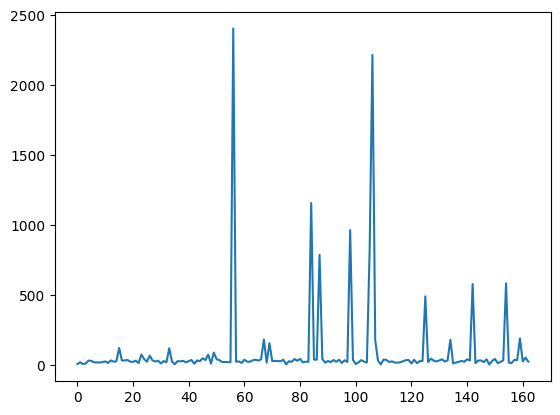

In [ ]:
plt.plot(sector_lengths)

Давайте считать выбросами всё, что больше 150 символов, и удалять это из множества. Остальное будет несложно удалить руками.

In [ ]:
unique_sectors = {sector for sector in unique_sectors if len(sector) <= 150}


In [ ]:
unique_sectors

{'A degree from an institution that is fully accredited by a nationally recognized educational accreditation organization; 2',
 'Account Management (Commissioned',
 'Account Management (Non-Commissioned',
 'Accounting/Finance/Insurance',
 'Accounts Payable/Receivable',
 'Administrative Support',
 'Administrative/Clerical',
 'Banking/Real Estate/Mortgage Professionals',
 'Biotech/R&D/Science',
 'Brand/Product Marketing',
 'Brand/Product Marketing General/Other: Marketing/Product Product Management',
 'Building Construction/Skilled Trades',
 'Business Development/New Accounts',
 'Business Development/New Accounts General/Other: Sales/Business Development Technical Presales Support & Technical Sales',
 'Business Unit Management',
 'Business/Strategic Management',
 'Call Center',
 'Car, Van and Bus Driving',
 'Career Level Entry Level',
 'Career Level Experienced (Non-Manager)',
 'Civil & Structural Engineering',
 'Computer/Electronics/Telecomm Install/Maintain/Repair',
 'Computer/Network 

Здесь попадается куча разных данных: сфера деятельности, уровень карьеры, требования к образованию. Если в одной строчке несколько пунктов, то они соединены пустой строкой. Попробуем разделить их и составить адекватное множество значений этой колонки.

Отделим General/Other и удалим, потому что оно ничего не обозначает. Также удалим слова Student, University, Experienced, Career Level, Education Level, Degree, University, Entry Level.

In [ ]:
processed_sectors = set()
for sector in unique_sectors:
    if 'General/Other' in sector:
        sector = sector.replace('General/Other: ', '')
    if sector and not any(word in sector for word in ['student', 'university', 'experience', 'career level', 'education level', 'degree', 'entry level',
                                                      'Student', 'University', 'Experience', 'Career Level', 'Education Level', 'Degree', 'Entry Level']):
        processed_sectors.add(sector)

In [ ]:
processed_sectors

{'Account Management (Commissioned',
 'Account Management (Non-Commissioned',
 'Accounting/Finance',
 'Accounting/Finance/Insurance',
 'Accounts Payable/Receivable',
 'Administrative Support',
 'Administrative/Clerical',
 'Banking/Real Estate/Mortgage Professionals',
 'Biotech/R&D/Science',
 'Brand/Product Marketing',
 'Brand/Product Marketing Marketing/Product Product Management',
 'Building Construction/Skilled Trades',
 'Business Development/New Accounts',
 'Business Development/New Accounts Sales/Business Development Technical Presales Support & Technical Sales',
 'Business Unit Management',
 'Business/Strategic Management',
 'Call Center',
 'Car, Van and Bus Driving',
 'Civil & Structural Engineering',
 'Computer/Electronics/Telecomm Install/Maintain/Repair',
 'Computer/Network Security',
 'Contracts Administration',
 'Corporate Accounting',
 'Creative/Design',
 'Customer Support/Client Care',
 'Customer Support/Client Care Retail Customer Service',
 'Data Entry/Order Processing',

In [ ]:
for i in ['Systems Analysis - ITWeb/UI/UX Design',
          'Sales/Business Development', 'Biotech/R&D/Science',
          'Program Management', 'Project Management', 'Food Services',
          'Customer Support/Client Care Retail Customer Service',
          'Business Development/New Accounts Sales/Business Development Technical Presales Support & Technical Sales',
           'Production/Operations Planning', 'Brand/Product Marketing Marketing/Product Product Management',
          'Account Management (Non-Commissioned', 'Account Management (Commissioned', 'Equipment Install/Maintain/Repair']:
    processed_sectors.discard(i)


for i in ['Web/UI/UX Design', ' Technical Presales Support & Technical Sales', 'Account Management']:
    processed_sectors.add(i)

Я посмотрела данные вручную и убрала всё, что заметила некрасивого. Теперь у нас есть множество секторов, попробуем поставить каждой строке в соответствие сектор из него.

Будем искать нужный сектор по максимальному совпадению слов. Если не нашли совпадения, будем просто заменять на NaN.

In [ ]:
def find_closest_sector(sector, processed_sectors):
    matches = get_close_matches(sector, processed_sectors, n=1, cutoff=0.1)
    return matches[0] if matches else np.nan

In [ ]:
for index, row in data.iterrows():
    if pd.notnull(row['sector']):
        data.at[index, 'sector'] = find_closest_sector(row['sector'], processed_sectors)

In [ ]:
data.sample(5)

,job_description,job_title,location,organization,page_url,sector,uniq_id,city,state,index,salary_from,salary_to,salary_period,bonus,employment_completeness,employment_type
16180,Are you looking to make a long lasting impact ...,Entry Level Account Manager,"North Charleston, SC 29406",RetailAdvertising and PR ServicesBusiness Serv...,http://jobview.monster.com/Entry-Level-Account...,Marketing/Product,de69090b7e568e149f090e4939076b0e,North Charleston,NaN,NaN,NaN,NaN,,NaN,Full Time,Employee
2583,Mechanical Engineer – Medical Device / Electro...,Mechanical Engineer - Medical Device,"Madison, WI 53704",Medical Devices and Supplies,http://jobview.monster.com/Mechanical-Engineer...,Office Management,76d0578c1dc44b318c4838a762aba517,Madison,WI,NaN,NaN,NaN,,NaN,Full Time,Employee
11403,Position ID# 75006 # Positions 1 State CA C...,Shift Supervisor,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-jo...,Project/Program Management,d8322e8ad809e08983bc050abb028d75,Camphill,PA,NaN,NaN,NaN,,NaN,Full Time,Employee
11409,Position PurposeThe Development Specialist is ...,Development Specialist,"Houston, TX",Other/Not Classified,http://jobview.monster.com/development-special...,Project/Program Management,00078a8d9ff6a213b8b2149bbda464de,Houston,TX,NaN,NaN,NaN,,NaN,Full Time,Employee
3712,KinderCare Education is the nation’s leader in...,Lead Teacher,"Madison, WI 53719",Education,http://jobview.monster.com/lead-teacher-job-ma...,Education/Training,1eae31c20d80c538f0f3078382b54e66,Madison,WI,NaN,NaN,NaN,,NaN,Full Time,Employee


Обработаем последнюю колонку - `organization`. В отличии от `sector`, которая отражает что-то вроде рода деятельности нанимаемого сотрудника, эта колонка содержит данные о том, чем занимается организация (это банк, IT-компания, страховая компания и так далее).

Посмотрим, какие значения в ней есть.

In [ ]:
data.organization.unique()

array([nan, 'Printing and Publishing',
       'Hotels and Lodging Personal and Household Services', 'Insurance',
       'Education', 'Accounting and Auditing Services',
       'AllComputer SoftwareComputer/IT Services',
       'Aerospace and Defense', 'Manufacturing - Other',
       'Advertising and PR ServicesManagement Consulting ServicesBusiness Services - Other',
       'Other/Not Classified',
       'Construction - Residential & Commercial/Office',
       'Engineering Services',
       'RetailAdvertising and PR ServicesBusiness Services - Other',
       'All', 'Electronics, Components, and Semiconductor Mfg',
       'Metals and Minerals', 'Walter Industrial and Sanitary Supply',
       'Nonprofit Charitable Organizations', 'Computer Software',
       'Transport and Storage - Materials',
       'Biotechnology/Pharmaceuticals',
       'Construction - Industrial Facilities and Infrastructure',
       'Travel, Transportation and Tourism', 'Marine Mfg & Services',
       'Rental Servic

Здесь встречаются данные в том виде, в котором они нам нужны (то есть в одной строке находится один organization), а кроме этого:

* "Слепленные" организации - строка содержит несколько нужных значений, которые соединены пустой строкой, пробелом, точкой с запятой или другими знаками препинания

* Местоположение

Других паттернов не было найдено, но они, возможно, обнаружатся позже.

Будем предобрабатывать их следующим образом:

1) Сверять с местоположением - если совпадает или соответствует паттернам местоположения, то удалять (не будем заниматься дообработкой местоположения, даже если оно присутствует в этой колонке и отсутствует в нужной)

2) Оставшиеся значения обработаем так же, как `sector` - поиском уникальных значений и присваиванием каждой строке наиболее близкого.

In [ ]:
def split_orgs(org):
    return re.split(r'(?<=[a-z])(?=[A-Z])|(?<=)\)\s*(?=[A-Z])', org)

unique_orgs = set()

for org in data['organization'].dropna():
    orgs = split_orgs(org)
    unique_orgs.update(orgs)

In [ ]:
print(unique_orgs)

{'Printing and Publishing Internet Services', 'Automotive Sales and Repair Services', 'Appleton, WI', 'La-Fayette, KY', 'Management Consulting Services', 'Healthcare Services Business Services - Other', 'Wilmington, DE 19803', 'San Antonio, TX 78205', 'Atlanta, GA 30301', 'Carlsbad, CA 92008', 'Iselin, NJ', 'Manufacturing - Other', 'Round Lake, IL 60073', 'Clothing and Textile Manufacturing', 'Systems/Process Engineering', 'Retail Advertising and PR Services Other/Not Classified', 'All;Advertising and PR Services;Business Services - Other', 'Oklahoma City, OK', 'Newark, DE', 'Tifco Industries, Inc.', 'Kentwood, MI 49508', 'Retail', 'Automotive and Parts Mfg', 'Hotels and Lodging Government and Military Food and Beverage Production', 'Santa Clara, CA 95054', 'Computer/IT Services', 'Healthcare Services Restaurant/Food Services Other/Not Classified', 'Retail;Advertising and PR Services;Sports and Physical Recreation', 'Seven Hills, OH 44131', 'Lake Zurich, IL 60047', 'Entertainment Venue

Мы немного почистили организации от слепленных значений. Теперь удалим местоположения, а затем почистим от значений, которые содержат несколько элементов, равзделённых какими-нибудь символами (например, точками с запятой).

Также отделим ото всех значений Other/Not Classified, если оно есть (кроме случаев, когда это единственное, что указано), вынесем его в отдельное значение. Заменим "Other", "Not Classified" и прочее на "Other/Not Classified".

In [ ]:
locations = set(data['city'].dropna().unique()) | set(data['state'].dropna().unique()) | set(data['index'].dropna().astype(str).unique())

filtered_orgs = unique_orgs - locations

print(filtered_orgs)


{'Printing and Publishing Internet Services', 'Automotive Sales and Repair Services', 'Appleton, WI', 'La-Fayette, KY', 'Management Consulting Services', 'Healthcare Services Business Services - Other', 'Wilmington, DE 19803', 'San Antonio, TX 78205', 'Atlanta, GA 30301', 'Carlsbad, CA 92008', 'Iselin, NJ', 'Manufacturing - Other', 'Round Lake, IL 60073', 'Clothing and Textile Manufacturing', 'Systems/Process Engineering', 'Retail Advertising and PR Services Other/Not Classified', 'All;Advertising and PR Services;Business Services - Other', 'Oklahoma City, OK', 'Newark, DE', 'Tifco Industries, Inc.', 'Kentwood, MI 49508', 'Retail', 'Automotive and Parts Mfg', 'Hotels and Lodging Government and Military Food and Beverage Production', 'Santa Clara, CA 95054', 'Computer/IT Services', 'Healthcare Services Restaurant/Food Services Other/Not Classified', 'Retail;Advertising and PR Services;Sports and Physical Recreation', 'Seven Hills, OH 44131', 'Lake Zurich, IL 60047', 'Entertainment Venue

Напишем функцию для определения, является ли значение местоположением. Очень грубо это можно сделать следующим образом: если есть цифры (это индекс!!), две подряд идущих заглавных буквы кроме IT (возможно, другие популярные буквосочетания тоже стоило учесть, но я не обнаружила их в ходе беглого просмотра данных) или запятая (так как именно она чаще всего разделяет город и код штата или город и индекс или что-нибудь ещё связанное с местоположением), то будем расценивать такое значение как локацию и удалять.

In [ ]:
def is_location(value):
    if any(char.isdigit() for char in value) or ',' in value:
        return True
    if re.search(r'b(?<!IT)[A-Z]{2}b', value):
        return True
    return False

In [ ]:
filtered_orgs = {org for org in filtered_orgs if not is_location(org)}
print(filtered_orgs)

{'Printing and Publishing Internet Services', 'Automotive Sales and Repair Services', 'Retail Banking Business Services - Other', 'Restaurant/Food Services', 'Medical Devices and Supplies', 'Transport and Storage - Materials Automotive Sales and Repair Services', 'Management Consulting Services', 'Real Estate/Property Management Legal Services', 'Healthcare Services Business Services - Other', 'Goodwill Industries', 'Barrow Industries', 'Automotive and Parts Mfg Manufacturing - Other Automotive Sales and Repair Services', 'Personal and Household Services', 'Computer Hardware Computer Software Computer/IT Services', 'Le', 'Advertising and PR Services Business Services - Other', 'Printing and Publishing', 'Manufacturing - Other', 'Healthcare Services Business Services - Other Other/Not Classified', 'Healthcare Services Other/Not Classified', 'Restaurant/Food Services;Food and Beverage Production;Other/Not Classified', 'Consumer Packaged Goods Manufacturing', 'Advertising and PR Services 

В некоторых строчках есть дефис, после которого идёт либо что-то более узкое, чем то, что до, либо неосмысленные слова (other, not classified и тому подобное). Давайте удалять всё, что после дефиса.

Также стоит удалять other, not classified или other/not classified из строки, если там написано что-то более значащее. Сделаем это.

In [ ]:
def clean_orgs(orgs_set):
    cleaned_orgs = set()
    for org in orgs_set:
        org = org.split('-')[0].strip()
        org = re.sub(r'\bother\b|\bnot classified\b|\bother/not classified\b', '', org, flags=re.IGNORECASE).strip()
        cleaned_orgs.add(org)
    return cleaned_orgs


In [ ]:
cleaned_orgs = clean_orgs(filtered_orgs)
print(cleaned_orgs)

{'Printing and Publishing Internet Services', 'Automotive Sales and Repair Services', 'Automotive and Parts Mfg Manufacturing', 'Advertising and PR Services;Staffing/Employment Agencies;Business Services', 'Restaurant/Food Services', 'Medical Devices and Supplies', 'Real Estate/Property Management Legal Services', 'Management Consulting Services', '•   Healthcare Services', 'Goodwill Industries', 'Barrow Industries', 'Personal and Household Services', 'Computer Hardware Computer Software Computer/IT Services', 'Le', 'Printing and Publishing', 'Chemicals/Petro', 'Advertising and PR Services Sports and Physical Recreation Business Services', 'Consumer Packaged Goods Manufacturing', 'Clothing and Textile Manufacturing', 'Systems/Process Engineering', 'Energy and Utilities Engineering Services', 'Retail Banking Business Services', 'Business Services', 'PPG Industries', 'Education Healthcare Services Sports and Physical Recreation', 'Printing and Publishing Construction', 'Real Estate/Prope

Из странного осталось:

* Небуквенные символы, которые используются в качестве разделителей и мусора (не имеется в виду слеш) - удалим

* Несколько значений, разделённых пробелом, в одной строке - отсмотрим руками, если не будет слишком много, если будет - будем искать наиболее близкое в множестве уникальных организаций и пытаться разделять

* Очень короткие строчки, не несущие смысла (например, Le) - не трогаем, возможно, для них найдётся близкое словосочетание в множестве, которое окажется релевантным

In [ ]:
def refine_orgs(orgs_set):
    refined_orgs = set()
    for org in orgs_set:
        org = re.sub(r'[^\w\s/]', '', org).strip()
        if len(org.split()) > 1 or len(org) > 2:
            refined_orgs.add(org)
    return refined_orgs

In [ ]:
refined_orgs = refine_orgs(cleaned_orgs)

In [ ]:
refined_orgs

{'Accounting and Auditing Services',
 'Accounting and Auditing Services Business Services',
 'Accounting and Auditing Services Financial Services /',
 'Accounting and Auditing Services Healthcare Services',
 'Accounting and Auditing Services Healthcare Services Hotels and Lodging',
 'Accounting and Auditing Services Nonprofit Charitable Organizations',
 'Accudyne Industries',
 'Advertising and PR Services',
 'Advertising and PR Services Business Services',
 'Advertising and PR Services Entertainment Venues and Theaters /',
 'Advertising and PR Services Management Consulting Services /',
 'Advertising and PR Services Management Consulting Services Business Services',
 'Advertising and PR Services Sports and Physical Recreation Business Services',
 'Advertising and PR ServicesStaffing/Employment AgenciesBusiness Services',
 'Aerospace and Defense',
 'Aerospace and Defense Legal Services',
 'Aerospace and DefenseGovernment and MilitarySecurity and Surveillance',
 'Agriculture/Forestry/Fis

Как мы видим, одинаково начинающихся названий, каждое из которых можно заменить на более широкое, довольно много. Попробуем придумать адекватную обработку.

In [ ]:
def minimize_orgs(orgs_set):
    sorted_orgs = sorted(orgs_set, key=len, reverse=True)
    for org in sorted_orgs:
        to_remove = [longer_org for longer_org in orgs_set if org in longer_org and org != longer_org]
        for remove_org in to_remove:
            orgs_set.discard(remove_org)
    return orgs_set

In [ ]:
minimized_orgs = minimize_orgs(refined_orgs)

In [ ]:
minimized_orgs

{'Accounting and Auditing Services',
 'Accudyne Industries',
 'Advertising and PR Services',
 'Aerospace and Defense',
 'Agriculture/Forestry/Fishing',
 'Aire',
 'All',
 'Altec Industries',
 'Architectural and Design Services',
 'Automotive Sales and Repair Services',
 'Automotive and Parts Mfg',
 'Banking',
 'Barrow Industries',
 'Biotechnology/Pharmaceuticals',
 'Bisco Industries',
 'Brennan Industries',
 'Bruker',
 'Business Services',
 'CNH Industrial',
 'Chemicals/Petro',
 'Chickasaw Nation Industries Aviation',
 'Coast Tool Industrial Solutions',
 'Computer Hardware',
 'Computer Software',
 'Computer/IT Services',
 'Construction',
 'EG Industries',
 'Education',
 'Electrical/Electronics Engineering',
 'Energy and Utilities',
 'Engineering Services',
 'Entertainment Venues and Theaters',
 'Financial Services',
 'Food and Beverage Production',
 'General/ Engineering',
 'Goodwill Industries',
 'Government and Military',
 'Healthcare Services',
 'Hotels and Lodging',
 'Industrial Des

У нас есть довольно красивое множество организаций. Теперь, аналогично секторам, для каждой строки в датафрейме найдём ближайший к ней элемент и заменим.

In [ ]:
def find_closest_org(org, minimized_orgs):
    matches = get_close_matches(org, minimized_orgs, n=1, cutoff=0.1)
    return matches[0] if matches else np.nan

for index, row in data.iterrows():
    if pd.notnull(row['organization']):
        data.at[index, 'organization'] = find_closest_org(row['organization'], minimized_orgs)

In [ ]:
data.sample(5)

,job_description,job_title,location,organization,page_url,sector,uniq_id,city,state,index,salary_from,salary_to,salary_period,bonus,employment_completeness,employment_type
2766,Security Officer Parker Corporate Services - P...,Security Officer,"Puyallup, WA 98373",NaN,http://jobview.monster.com/security-officer-jo...,Education/Training,735abd283db76efe65af1c8326bc9b62,Puyallup,WA,NaN,NaN,12.0,hour,/hour,Full Time,Employee
12617,Customer Service / Restaurant / Bar / Retail E...,RETAIL / RESTAURANT / CUSTOMER SERVICE EXPERIE...,"Columbus, OH",Retail,http://jobview.monster.com/RETAIL-RESTAURANT-C...,IT/Software Development,fb356ef944640e1a7725ba7e92858a87,Columbus,OH,NaN,NaN,NaN,week,NaN,Full Time,Employee
15648,· Drive sales by overseeing sales floo...,Store Manager,"Las Vegas, NV 89106",NaN,http://jobview.monster.com/Store-Manager-Job-L...,NaN,65cfc1ac6d86e0c477584eaadf708f81,Las Vegas,NaN,NaN,NaN,NaN,,NaN,Full Time,Employee
382,PURPOSE Work closely with global clients and o...,Principle Epidemiologist,"Durham, NC 27703",Biotechnology/Pharmaceuticals,http://jobview.monster.com/principle-epidemiol...,R&D/Science,3b9421b259e492201f982408be08b634,Durham,NC,NaN,NaN,NaN,,NaN,Full Time,Employee
6577,Job Responsibilities: You are responsible for ...,Restaurant Manager / General Manager,"Shreveport, LA 71101",Hotels and Lodging,http://jobview.monster.com/Restaurant-Manager-...,Food Services/Hospitality,92c81ef14181e5649c201d750c0b678a,Shreveport,LA,NaN,NaN,NaN,,NaN,Full Time,Employee


Все нужные колонки предобработаны. Остаётся красиво упорядочить столбцы в датафрейме.

In [ ]:
columns_order = [
    'job_title', 'job_description', 'page_url', 'organization',
    'city', 'state', 'index', 'sector', 'salary_from', 'salary_to',
    'salary_period', 'bonus', 'employment_completeness', 'employment_type',
    'uniq_id'
]

data = data[columns_order]

In [ ]:
data.sample(5)

,job_title,job_description,page_url,organization,city,state,index,sector,salary_from,salary_to,salary_period,bonus,employment_completeness,employment_type,uniq_id
83,Supplier Quality Engineer (with medical device),We are looking for a Supplier Quality Engineer...,http://jobview.monster.com/Supplier-Quality-En...,NaN,Plymouth,MN,NaN,Office Management,NaN,NaN,,NaN,Full Time,Employee,e3c1c087a29e83d6537556a5cf91b783
11587,Scrum Master,Our client is currently seeking a Scrum Master...,http://jobview.monster.com/scrum-master-job-fr...,Computer/IT Services,Framingham,MA,NaN,IT/Software Development,NaN,NaN,,NaN,Full Time,Employee,1166c4beb4fdd7da7ef450d181a88cbf
15534,Field Sales Representative,"Hartwell Global, Inc. - Las Vegas, NVHartwell ...",http://jobview.monster.com/Field-Sales-Represe...,NaN,Las Vegas,NaN,NaN,NaN,NaN,NaN,,NaN,Full Time,Employee,bb953cd6d6c5be01e801f495e5ae0f29
4904,*Retail Sales Associate Bilingual - Spanish*,"As America""s Un-carrier, T-Mobile US, Inc. (NY...",http://jobview.monster.com/retail-sales-associ...,NaN,Metairie,LA,NaN,NaN,NaN,NaN,,NaN,Full Time,Employee,2e7c929997c02bee602541d75cae92be
16223,Network Communications,Description Northrop Grumman is looking for ...,http://jobview.monster.com/Network-Communicati...,NaN,Falls Church,NaN,NaN,Manufacturing/Production/Operations,NaN,NaN,,NaN,Full Time,Employee,d0e173220ef285c3161b136f4c560754


На этом закончим предобработку.

### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных.
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Выберите один и реализуйте его. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

У нас есть датафрейм data_copy, который является исходным в первозданном виде. Для наглядности сравним матрицу пустых значений и количество уникальных значений в некоторых колонках, среднюю длину значения в них.
Этого должно хватить для того, чтобы оценить, что данные хорошо предобработаны.

In [ ]:
data_copy.sample(3)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
21796,United States of America,US,NaN,No,jobs.monster.com,Equipment and Systems Engineer Requirements Ex...,Equipment and Systems Engineer - Cincinnati,"Full Time , Temporary/Contract/Project","Cincinnati, OH",Computer/IT Services,http://jobview.monster.com/Equipment-Systems-E...,NaN,IT/Software Development,55ae0137ae5568fd2ecdbf8674c31106
3112,United States of America,US,NaN,No,jobs.monster.com,Job Description The case manager coordinates t...,RN Case Manager - Case Management Job in Corpu...,"Full Time, Employee","Corpus Christi, TX",Healthcare Services,http://jobview.monster.com/RN-Case-Manager-Cas...,NaN,Medical/Health,ca3f3e3ae74a9f32e4e7752a5db02e3c
5640,United States of America,US,NaN,No,jobs.monster.com,Receptionist / Legal Secretary - Law firm lo...,Receptionist - Legal Secretary Job in Pittsburgh,Full Time,"Pittsburgh, PA 15222",Legal Services,http://jobview.monster.com/Receptionist-Legal-...,Great Salary and Benefits,Entry Level,6a283b2a44d47ee288ede2a6b0389e52


In [ ]:
data.sample(3)

,job_title,job_description,page_url,organization,city,state,index,sector,salary_from,salary_to,salary_period,bonus,employment_completeness,employment_type,uniq_id
13020,Package Development Engineer,Package Development Engineering Job Descriptio...,http://jobview.monster.com/Package-Development...,Computer/IT Services,Cincinnati,OH,NaN,Manufacturing/Production/Operations,NaN,NaN,,NaN,Full Time,Temporary/Contract/Project,72bd800ff756aa9cead7a3f63030c697
7732,Cook,"Full-TimeAmber Park Cincinnati, OH 3801 East G...",http://jobview.monster.com/Cook-Job-Cincinnati...,Food and Beverage Production,Cincinnati,OH,NaN,Food Services/Hospitality,NaN,NaN,,NaN,Full Time,Employee,52a51d6d0181b01a4838844989d27944
2526,Computer Technician / Help Desk Support Techni...,About Us: Renaissance Learning is a leading pr...,http://jobview.monster.com/Computer-Technician...,Education,Madison,WI,NaN,IT/Software Development,NaN,NaN,,NaN,Full Time,Employee,d8b528cfab28514c71d649a8a67ee817


In [ ]:
data_copy.shape

(22000, 14)

In [ ]:
data.shape

(18617, 15)

Мы удаляли дубликаты по названиям и описаниям, удалили нерелевантные колонки и добавили новые.
Посмотрим на матрицы пустых значений.

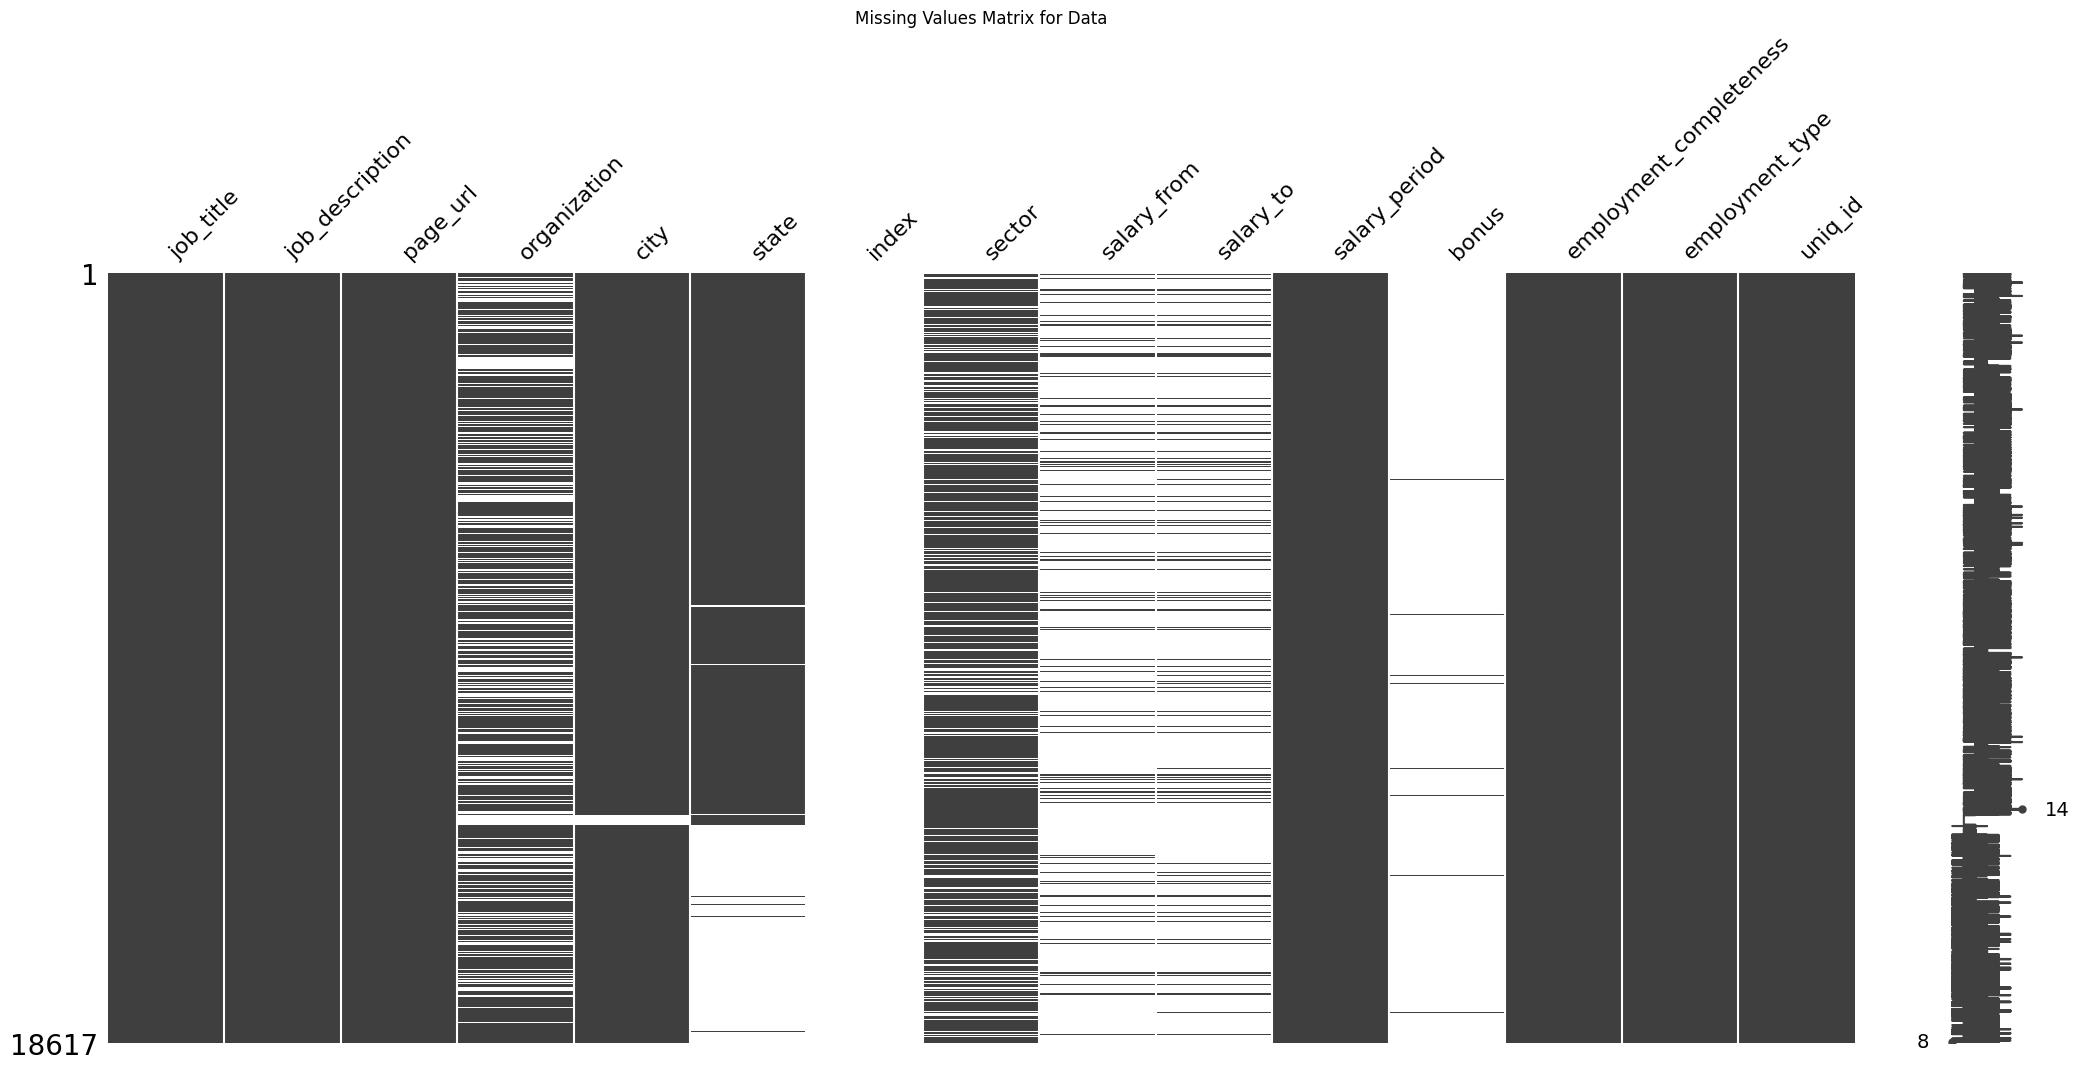

In [ ]:
msno.matrix(data)
plt.title('Missing Values Matrix for Data')
plt.show()

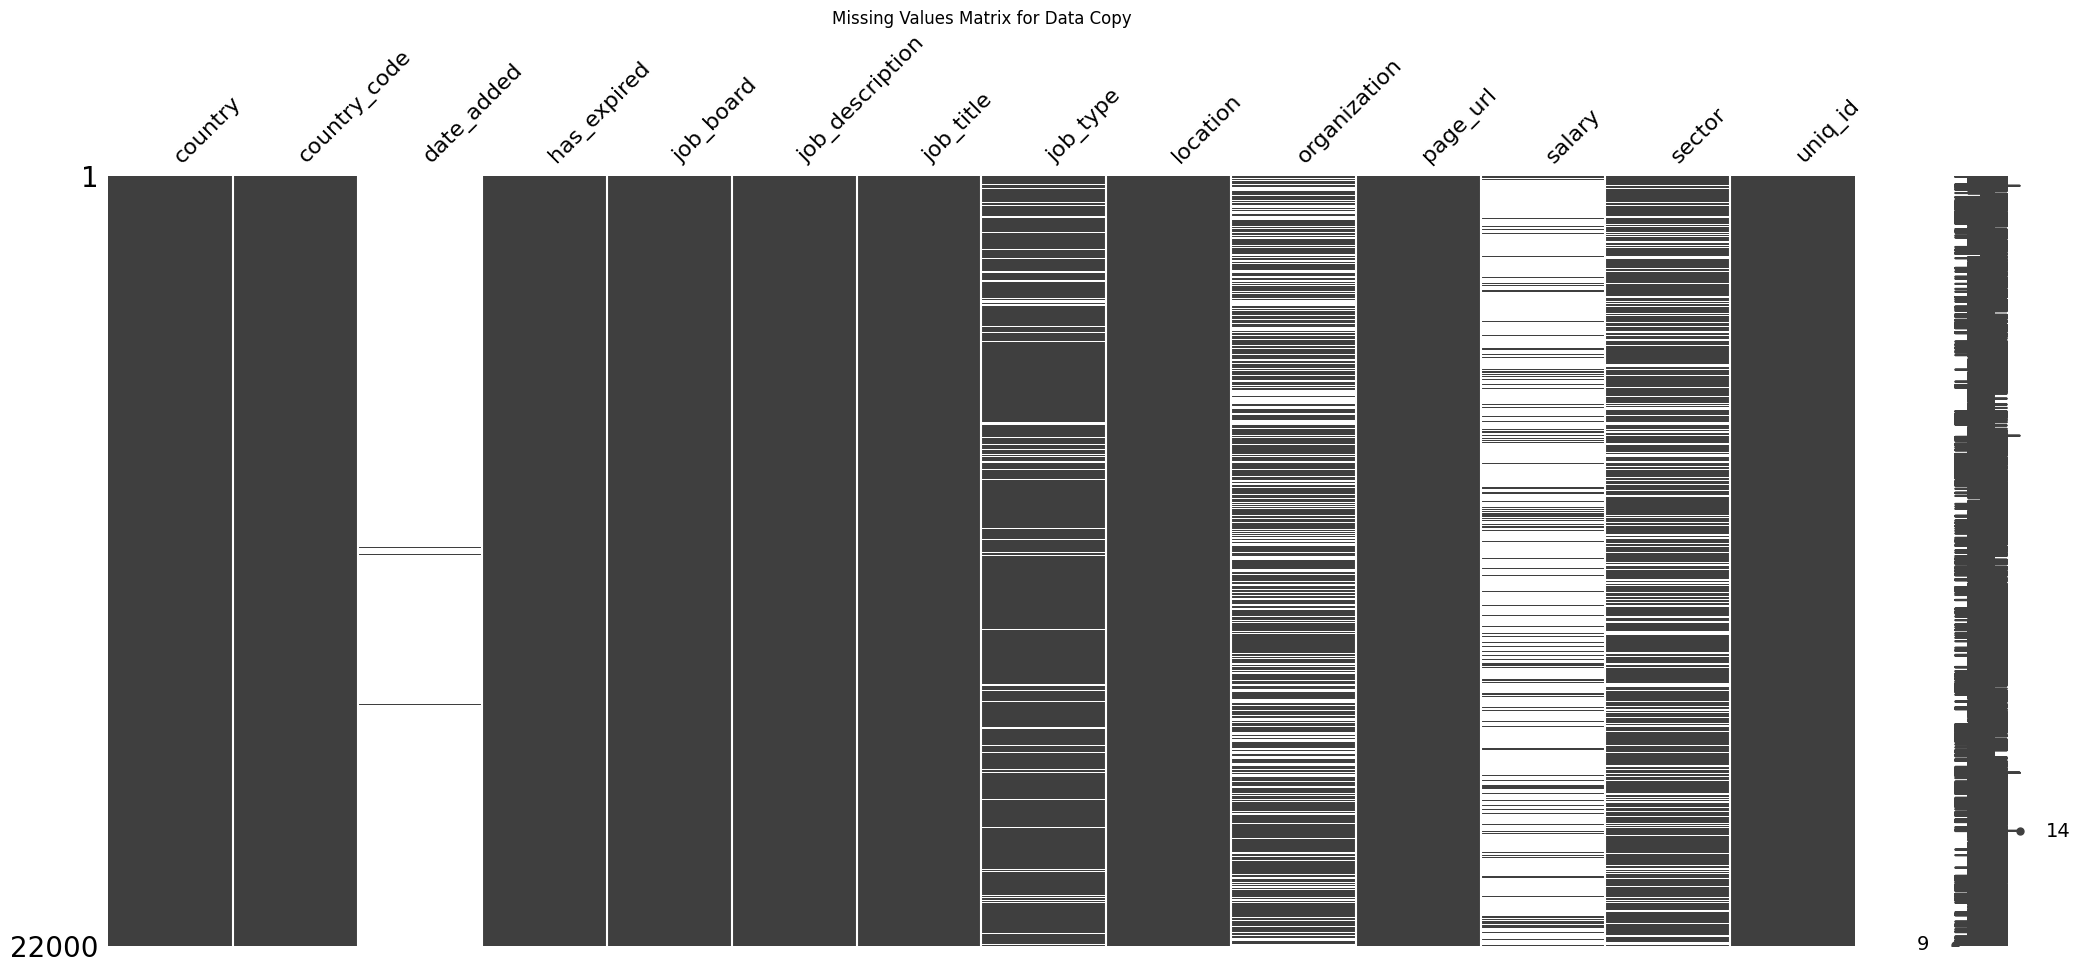

In [ ]:
msno.matrix(data_copy)
plt.title('Missing Values Matrix for Data Copy')
plt.show()

В дальнейшем можно подумать над обработкой итогового датафрейма. Некоторые колонки (например, index) можно смело удалять, так как в них слишком мало важной информации. Но мы этого делать не будем.

Теперь посмотрим на уникальные значения и их количество в обоих датафреймах.

In [ ]:
print('Unique values in data:')
print('Organization:', data['organization'].nunique())
print('Sector:', data['sector'].nunique())
print('Employment Completeness:', data['employment_completeness'].nunique())
print('Employment Type:', data['employment_type'].nunique())

print('Unique cities in data:', data['city'].nunique())
print('Unique states in data:', data['state'].nunique())
print('Unique indexes in data:', data['index'].nunique())

Unique values in data:
Organization: 75
Sector: 89
Employment Completeness: 3
Employment Type: 4
Unique cities in data: 3351
Unique states in data: 64
Unique indexes in data: 0


In [ ]:
print('Unique values in data_copy:')
print('Organization:', data_copy['organization'].nunique())
print('Sector:', data_copy['sector'].nunique())
print('Job type:', data_copy['job_type'].nunique())
print('Location:', data_copy['location'].nunique())


Unique values in data_copy:
Organization: 738
Sector: 163
Job type: 39
Location: 8423


Мы сильно сократили количество возможных организаций, секторов и job type-ов, удалив мусор.

Посмотрим на типы данных.

In [ ]:
print('Data types in data:')
print(data.dtypes)
print('Data types in data_copy:')
print(data_copy.dtypes)

Data types in data:
job_title                   object
job_description             object
page_url                    object
organization                object
city                        object
state                       object
index                       object
sector                      object
salary_from                float64
salary_to                  float64
salary_period               object
bonus                       object
employment_completeness     object
employment_type             object
uniq_id                     object
dtype: object
Data types in data_copy:
country            object
country_code       object
date_added         object
has_expired        object
job_board          object
job_description    object
job_title          object
job_type           object
location           object
organization       object
page_url           object
salary             object
sector             object
uniq_id            object
dtype: object


У нас есть две колонки с числами, как и ожидалось. Теперь мы уверены, что в зарплате только числа.

Я считаю, что текущих этапов обработки достаточно, так как удалены нерелевантные колонки, неправильные форматы значений скорректированы, данные читаемые.
Данные могут быть полезны рекрутерам и аналитикам рынка для того, чтобы понять, какая, например, зарплатная вилка у определённой вакансии на рынке, какие условия предлагаются компаниями, какие бонусы, из этих соображений грамотно "продать" свою вакансию.
Также данные полезны соискателям для анализа и понимания, какие навыки обычно требуются для каких вакансий, какие специалисты пользуются хорошим спросом в каких локациях, на какую зарплату можно рассчитывать.

Могут потребоваться такие этапы обработки, как, например, группировка или сортировка по каким-то признакам, также восстановление пропусков с помощью машинного обучения (или без него, но не самым наивным способом, так как данные, восстановленные таким образом, вполне могут не отражать реальной картины происходящего).